In [4]:
import pandas as pd

# Simulated dataset
custdata = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ProductType': ['Electronics', 'Grocery', 'Grocery', 'Clothing', 'Electronics',
                    'Clothing', 'Grocery', 'Electronics', 'Clothing', 'Grocery'],
    'Frequency': [5, 20, 15, 10, 6, 7, 25, 4, 6, 30],
    'AmountSpent': [1500, 300, 450, 800, 1600, 750, 200, 1400, 900, 180],
}


In [5]:
df = pd.DataFrame(custdata)
print(df.head(10))

   CustomerID  ProductType  Frequency  AmountSpent
0           1  Electronics          5         1500
1           2      Grocery         20          300
2           3      Grocery         15          450
3           4     Clothing         10          800
4           5  Electronics          6         1600
5           6     Clothing          7          750
6           7      Grocery         25          200
7           8  Electronics          4         1400
8           9     Clothing          6          900
9          10      Grocery         30          180


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop ID
df_cleaned = df.drop(columns=['CustomerID'])

# Encode categorical
le = LabelEncoder()
df_cleaned['ProductType'] = le.fit_transform(df_cleaned['ProductType'])

In [7]:
# Normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [13]:
print("Final dataframe after cluster assignment:\n")
print(df)

Final dataframe after cluster assignment:

   CustomerID  ProductType  Frequency  AmountSpent  Cluster
0           1  Electronics          5         1500        2
1           2      Grocery         20          300        1
2           3      Grocery         15          450        1
3           4     Clothing         10          800        0
4           5  Electronics          6         1600        2
5           6     Clothing          7          750        0
6           7      Grocery         25          200        1
7           8  Electronics          4         1400        2
8           9     Clothing          6          900        0
9          10      Grocery         30          180        1


In [11]:
#Evaluation

from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.76


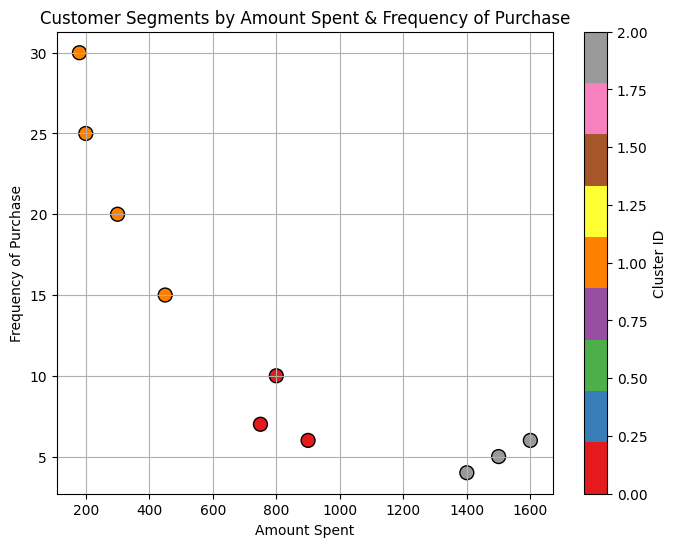

In [15]:
import matplotlib.pyplot as plt

# Plot AmountSpent vs Frequency with cluster color
plt.figure(figsize=(8, 6))
plt.scatter(df['AmountSpent'], df['Frequency'], c=df['Cluster'], cmap='Set1', s=100, edgecolor='k')

plt.title("Customer Segments by Amount Spent & Frequency of Purchase")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency of Purchase")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.show()
